This project aims to build a machine learning model to classify flowers in the Iris dataset into one of three species: Setosa, Versicolor, and Virginica, based on four key features: sepal length, sepal width, petal length, and petal width.

The Iris dataset, a classic in the machine learning community, contains 150 records, with 50 samples from each of the three Iris species. It is widely used for supervised classification problems.

The models achieved high accuracy, demonstrating that the Iris dataset can be effectively classified with simple machine learning techniques. Among the models, [insert best-performing model here based on notebook results] provided the best results.

This project illustrates a foundational machine learning workflow from data loading to model evaluation, making it an excellent starting point for beginners in classification problems.

In [1]:
# Loading and working with data in tabular form (DataFrame)
import pandas as pd
# Numerical operations and handling arrays
import numpy as np
# Plotting graphs and charts
import matplotlib.pyplot as plt
# Creating attractive and informative statistical graphics
import seaborn as sns
# To split the dataset into training and testing 
from sklearn.model_selection import train_test_split
# To normalize the data (important for some models
from sklearn.preprocessing import StandardScaler
# To convert categorical text data into numerical
from sklearn.preprocessing import LabelEncoder
# To print precision, recell, f1-score
from sklearn.metrics import classification_report
# To measure the percentage of correct predictions
from sklearn.metrics import accuracy_score
# To evaluate model performance using confusion matrix
from sklearn.metrics import confusion_matrix
# K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# Random Forestclassifier
from sklearn.ensemble import RandomForestClassifier
# Support Vector classifier
from sklearn.svm import SVC

# Loading the Dataset

In [2]:
df = pd.read_csv('iris.csv')

# Display top 5 records¶

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Display last 5 records

In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Display all Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 5 Points Summary Data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# To Check null values

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Display Numbers of Rows and Columns

In [9]:
df.shape

(150, 5)

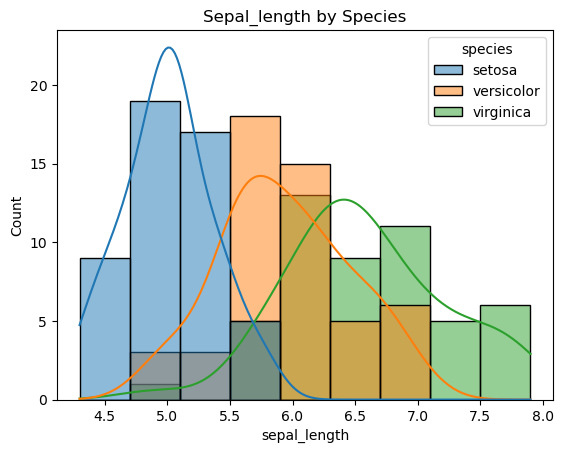

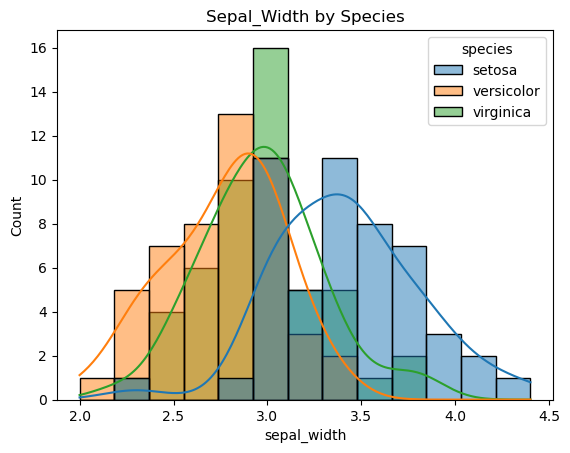

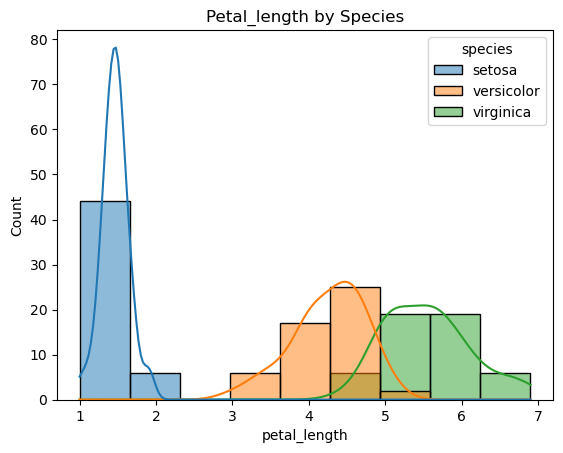

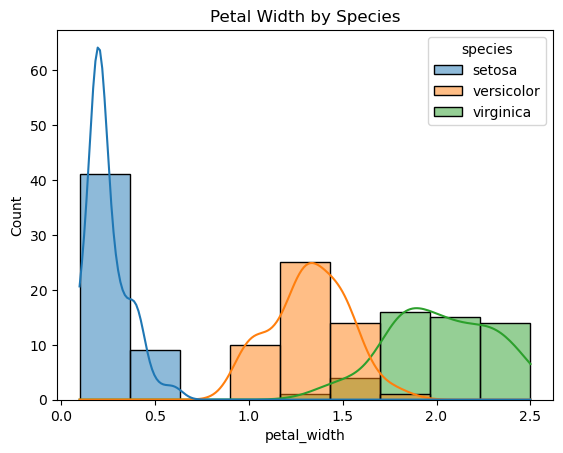

In [10]:
# Sepal Length
sns.histplot(data=df,x='sepal_length', hue='species', kde=True)
plt.title('Sepal_length by Species')
plt.show()

# Sepal Width
sns.histplot(data=df,x='sepal_width', hue='species', kde=True)
plt.title('Sepal_Width by Species')
plt.show()

# Petal Length
sns.histplot(data=df,x='petal_length', hue='species', kde=True)
plt.title('Petal_length by Species')
plt.show()

# Petal Width
sns.histplot(data=df,x='petal_width', hue='species', kde=True)
plt.title('Petal Width by Species')
plt.show()

# Observation

1. The dataset contains 150 rows and 5 columns, indicating it includes multiple samples of flower measurements across different species.
2. The sepal length distributions overlap somewhat between species, making it a moderately useful feature for classification.
3. The sepal width feature shows a wider spread, especially for Setosa, but also considerable overlap among species.
4. The petal length distribution shows clear separation, with Setosa having significantly shorter petal lengths than the other species.
5. The KDE curves in the petal length plot show distinct peaks for each species, highlighting this feature's strong discriminative power.
6. Petal width also displays good separation; Setosa has low values, while Virginica shows higher values.
7. The use of hue='species' in all plots allows for visual comparison across species, enhancing interpretability.
8. The histplot with kde=True provides both frequency (bars) and density (curves), helping understand the shape of data distribution.
9. The visualizations indicate that petal-based features (length and width) are more effective for distinguishing between species than sepal-based ones.
10. Overall, the plots help confir

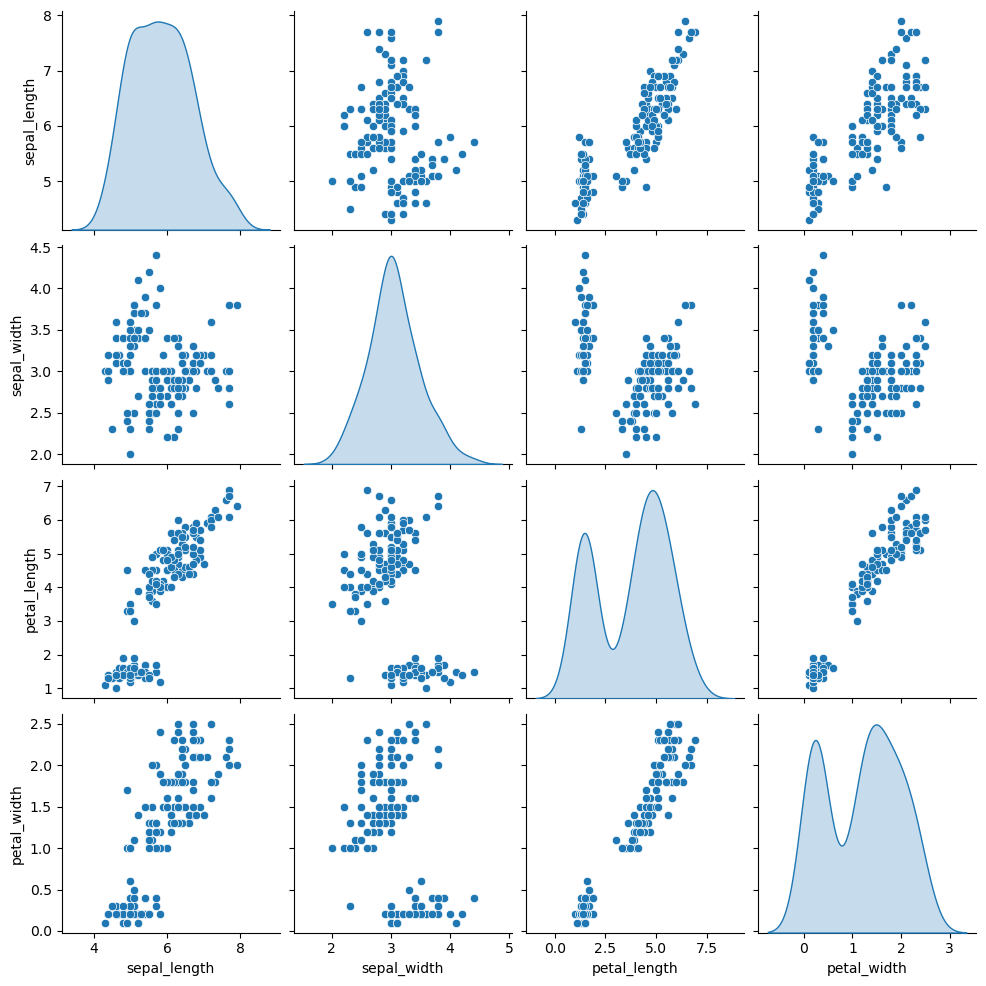

In [19]:
sns.pairplot(data=df,diag_kind='kde')

# Observation
1. Petal length vs petal width shows a strong positive correlation, indicating that as petal length increases, petal width also increases.
2. Sepal length vs sepal width shows a weak or no correlation; the data points are widely scattered.
3. Petal features (length and width) seem to clearly separate the species into distinct clusters, especially compared to sepal features.
4. Sepal length vs petal length exhibits a moderately positive correlation.
5. Sepal width shows a more uniform distribution with a peak around 3.0, indicating it's less variable compared to other features.
6. Petal width has a bimodal distribution, indicating the presence of two main groups, likely corresponding to different species.
7. Petal length also shows a multimodal distribution, strongly suggesting class separability.
8. The KDE plots (diagonal plots) show smooth density curves, with petal width and petal length having distinct modes.
9. There is one cluster of data points with small petal length and petal width—this likely corresponds to the Iris-setosa species.

In [20]:
# Drop the species 'column' frim the dataset
X = df.drop('species',axis=1)
y = df['species']    # Set the Target Variable

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=2,random_state=0)

In [23]:
# Scale the data using StanderdScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Train a K-Nearest Neighbors classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
# Train a Logistic Regression model 
lc = LogisticRegression(max_iter=1000)  # increase max_iter
lc.fit(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lc.fit(X_train_scaled, y_train)

lc = LogisticRegression(solver='liblinear')
lc.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [25]:
# Predict the labels of the training data
y_pred = classifier.predict(X_train)

In [29]:
# Predict the labels of the test data
y_pred = classifier.predict(X_test)

In [30]:
# Confussion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1 0]
 [0 1]]


In [50]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_train)
print('Accuracy score of KNeighbors Classifier :',100*accuracy_score(y_train, knn_pred))

Accuracy score of KNeighbors Classifier : 95.27027027027027


In [51]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=7, criterion = 'entropy', random_state=7)
rfc.fit(X_train, y_train)
rfc_pred = knn.predict(X_train)
print('Accuracy score of KNeighbors Classifier :',100*accuracy_score(y_train, rfc_pred))

Accuracy score of KNeighbors Classifier : 95.27027027027027


In [52]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_train)
print('Accuracy score of SVC :',100*accuracy_score(y_train, svc_pred))

Accuracy score of SVC : 97.2972972972973


In [53]:
# Logistic Regression
lc.fit(X_train, y_train)
lc_pred = lc.predict(X_train)  # corrected variable name
print('Accuracy score of Logistic Regression :',100*accuracy_score(y_train, lc_pred))

Accuracy score of Logistic Regression : 92.56756756756756


In [49]:
print(f'Classification Report:')
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00         1
   virginica       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

